In [1]:
import os
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import unicodedata
import string
import emojis


import nltk
#nltk.download()
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import  TfidfVectorizer 
from sklearn.decomposition import NMF

from collections import Counter

In [2]:
df = pd.read_csv('rave_esc.csv', encoding='utf-8')

In [10]:
df.head(20)

,Unnamed: 0,index,date,name,msg,date1,time,conv_name
0,0,0,2019-02-21 14:11,Ambasen Shinde,Saala Tu bhi aagaya gandu,2019-02-21,14:11:00,NaN
1,1,1,2019-02-21 14:12,Aamir Rave,Amba shaadi ki tayyari kaisi chal rahi hai,2019-02-21,14:12:00,NaN
2,2,2,2019-02-21 14:12,Aniruddha Rave,Amba Shopping hua kya,2019-02-21,14:12:00,NaN
3,3,3,2019-02-21 14:12,Ambasen Shinde,Chal rahi hai bhai acche se,2019-02-21,14:12:00,NaN
4,4,4,2019-02-21 14:12,Ambasen Shinde,Ha bhai,2019-02-21,14:12:00,NaN
5,5,5,2019-02-21 14:12,Aniruddha Rave,Kuch bhul jayega to bolna mujhe. Main leke aat...,2019-02-21,14:12:00,NaN
6,6,6,2019-02-21 14:13,Ambasen Shinde,Hahaha,2019-02-21,14:13:00,NaN
7,7,7,2019-02-21 14:13,Aniruddha Rave,Vaise ghoomne kaha ja raha hai,2019-02-21,14:13:00,NaN
8,8,8,2019-02-21 14:17,Ambasen Shinde,UK😍,2019-02-21,14:17:00,NaN
9,9,9,2019-02-21 14:18,+91 98671 23311,Abbey ghumne project related kaam nahi😜🤣,2019-02-21,14:18:00,NaN


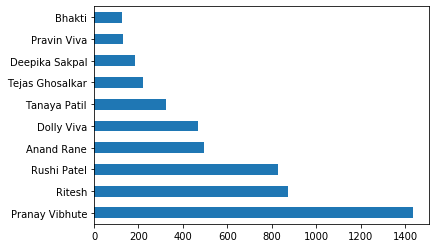

In [36]:
name_count = df['name'].value_counts()
name_10 = name_count.head(10)
name_10.plot.barh()

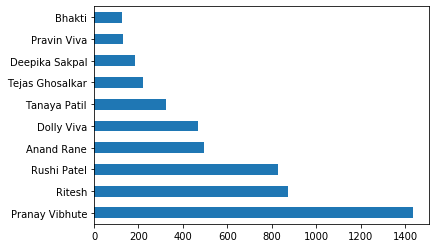

In [37]:
ax = name_10.plot.barh()
fig = ax.get_figure()
fig.savefig('fig.pdf', bbox_inches = 'tight')

In [38]:
ab = df[df['name']=='Bhakti']


Text(0, 0.5, 'Time')

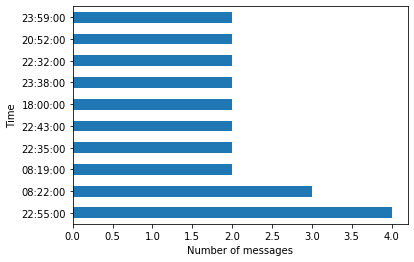

In [39]:
ab['time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

In [40]:
ab['hour'] = ab['time'].apply(lambda x : x.split(':')[0]) # The first token of a value in the Time Column contains the hour (Eg., "20" in "20:15")


C:\Users\RiteshK\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Hour of Day')

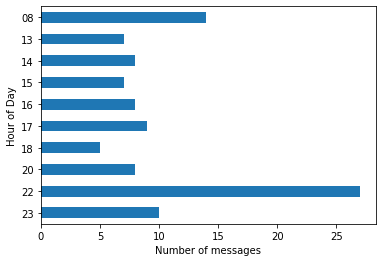

In [41]:
ab['hour'].value_counts().head(10).sort_index(ascending=False).plot.barh() # Top 10 Hours of the day during which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Hour of Day')

In [237]:
from textblob import TextBlob
TextBlob(str(ab['msg'])).sentiment


Sentiment(polarity=0.311142857142857, subjectivity=0.5429206349206354)

In [42]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(str(ab['msg'][3:4]))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RiteshK\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [108]:
sentiment = df['msg'].apply(lambda x : sid.polarity_scores(x))
#new_ab=pd.concat([df,sentiment.apply(pd.Series)],1)

AttributeError: 'bytes' object has no attribute 'encode'

In [240]:
print(ab.shape)
print(new_ab.shape)

(635, 7)
(635, 11)


In [258]:
new_ab.head()

,date,name,msg,date1,time,conv_name,hour,neg,neu,pos,compound
2,2015-11-18 15:48:00,Bhakti,Motu..,2015-11-18,15:48:00,NaN,15,0.0,1.0,0.0,0.0
4,2015-11-28 21:00:00,Bhakti,Motu...,2015-11-28,21:00:00,NaN,21,0.0,1.0,0.0,0.0
5,2015-11-28 21:02:00,Bhakti,???,2015-11-28,21:02:00,NaN,21,0.0,1.0,0.0,0.0
7,2015-11-28 21:03:00,Bhakti,😢😢,2015-11-28,21:03:00,NaN,21,0.0,1.0,0.0,0.0
9,2015-11-28 21:04:00,Bhakti,Mala bolaich hotah...pn to kartik yetoi...mala...,2015-11-28,21:04:00,NaN,21,0.0,1.0,0.0,0.0


In [259]:
new_ab.describe()

,conv_name,neg,neu,pos,compound
count,0.0,2022.000000,2022.000000,2022.000000,2022.000000
mean,NaN,0.009172,0.949472,0.032455,0.015662
std,NaN,0.066033,0.180870,0.143557,0.109104
min,NaN,0.000000,0.000000,0.000000,-0.802000
25%,NaN,0.000000,1.000000,0.000000,0.000000
50%,NaN,0.000000,1.000000,0.000000,0.000000
75%,NaN,0.000000,1.000000,0.000000,0.000000
max,NaN,1.000000,1.000000,1.000000,0.765000


In [226]:
0.028223+0.791741+0.138038

0.958002

In [31]:
emojis.count(str(df['msg'][5]))

16

In [75]:
emoji_count = df['msg'].apply(lambda x : emojis.count(str(x)))
#sentiment = df['msg'].apply(lambda x : sid.polarity_scores(x))

In [76]:
new_df=pd.concat([df, emoji_count.apply(pd.Series)],1)

In [47]:
new_df.head()

,date,name,msg,date1,time,conv_name,neg,neu,pos,compound,0
0,2015-11-09 11:17:00,nisha,"On this auspicious festival,",2015-11-09,11:17:00,NaN,0.0,0.484,0.516,0.4939,0
1,2015-11-10 17:13:00,Ritesh,"Happy Diwali mitrano, maitrininno ani girlfrie...",2015-11-10,17:13:00,NaN,0.0,0.575,0.425,0.5719,0
2,2015-11-17 10:21:00,Ritesh,Are aaj baba ranjit ka bday h,2015-11-17,10:21:00,NaN,0.0,1.000,0.000,0.0000,0
3,2015-11-17 10:30:00,Pranay Vibhute,आज दि.१७ नोव्हेंबर,2015-11-17,10:30:00,NaN,0.0,1.000,0.000,0.0000,0
4,2015-11-17 13:31:00,Dolly Viva,Happy birthday bhakti,2015-11-17,13:31:00,NaN,0.0,0.351,0.649,0.5719,0


In [48]:
new_df.describe()

,conv_name,neg,neu,pos,compound,0
count,0.0,5322.000000,5322.000000,5322.000000,5322.000000,5322.000000
mean,NaN,0.012428,0.875396,0.080610,0.049233,0.971064
std,NaN,0.080230,0.283073,0.224746,0.180737,3.497886
min,NaN,0.000000,0.000000,0.000000,-0.802000,0.000000
25%,NaN,0.000000,1.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,1.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,1.000000,0.000000,0.000000,1.000000
max,NaN,1.000000,1.000000,1.000000,0.960900,189.000000


In [49]:
new_df.to_csv('emoji.csv')

In [77]:
new_df = new_df.rename(columns={0: "emoji_count"})

In [62]:
new_df.columns

Index(['date', 'name', 'msg', 'date1', 'time', 'conv_name', 'neg', 'neu',
       'pos', 'compound', 'emoji_count'],
      dtype='object')

In [95]:
emoji_count = new_df.groupby(['name'])[["emoji_count"]].sum().sort_values('emoji_count', ascending=False)

In [96]:
import seaborn as sns

In [97]:
emoji_count_10 = emoji_count.head(10)

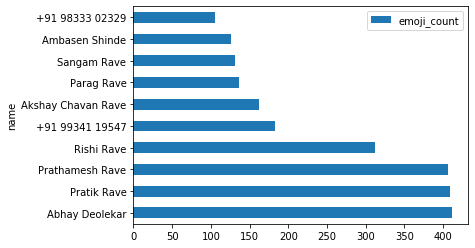

In [98]:
emoji_count_10.plot.barh()

In [99]:
emoji_count_10

,emoji_count
name,
Abhay Deolekar,412
Pratik Rave,409
Prathamesh Rave,407
Rishi Rave,312
+91 99341 19547,183
Akshay Chavan Rave,162
Parag Rave,136
Sangam Rave,131
Ambasen Shinde,126


In [109]:
stop = stopwords.words('english')

In [114]:
text = df['msg'].apply(lambda x: [item for item in x if item not in stop])

In [116]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [124]:
stop_words = ["message", "deleted", "ke", 'hai', 'kya', 'tu', 'ye', 'ha'] + list(STOPWORDS)

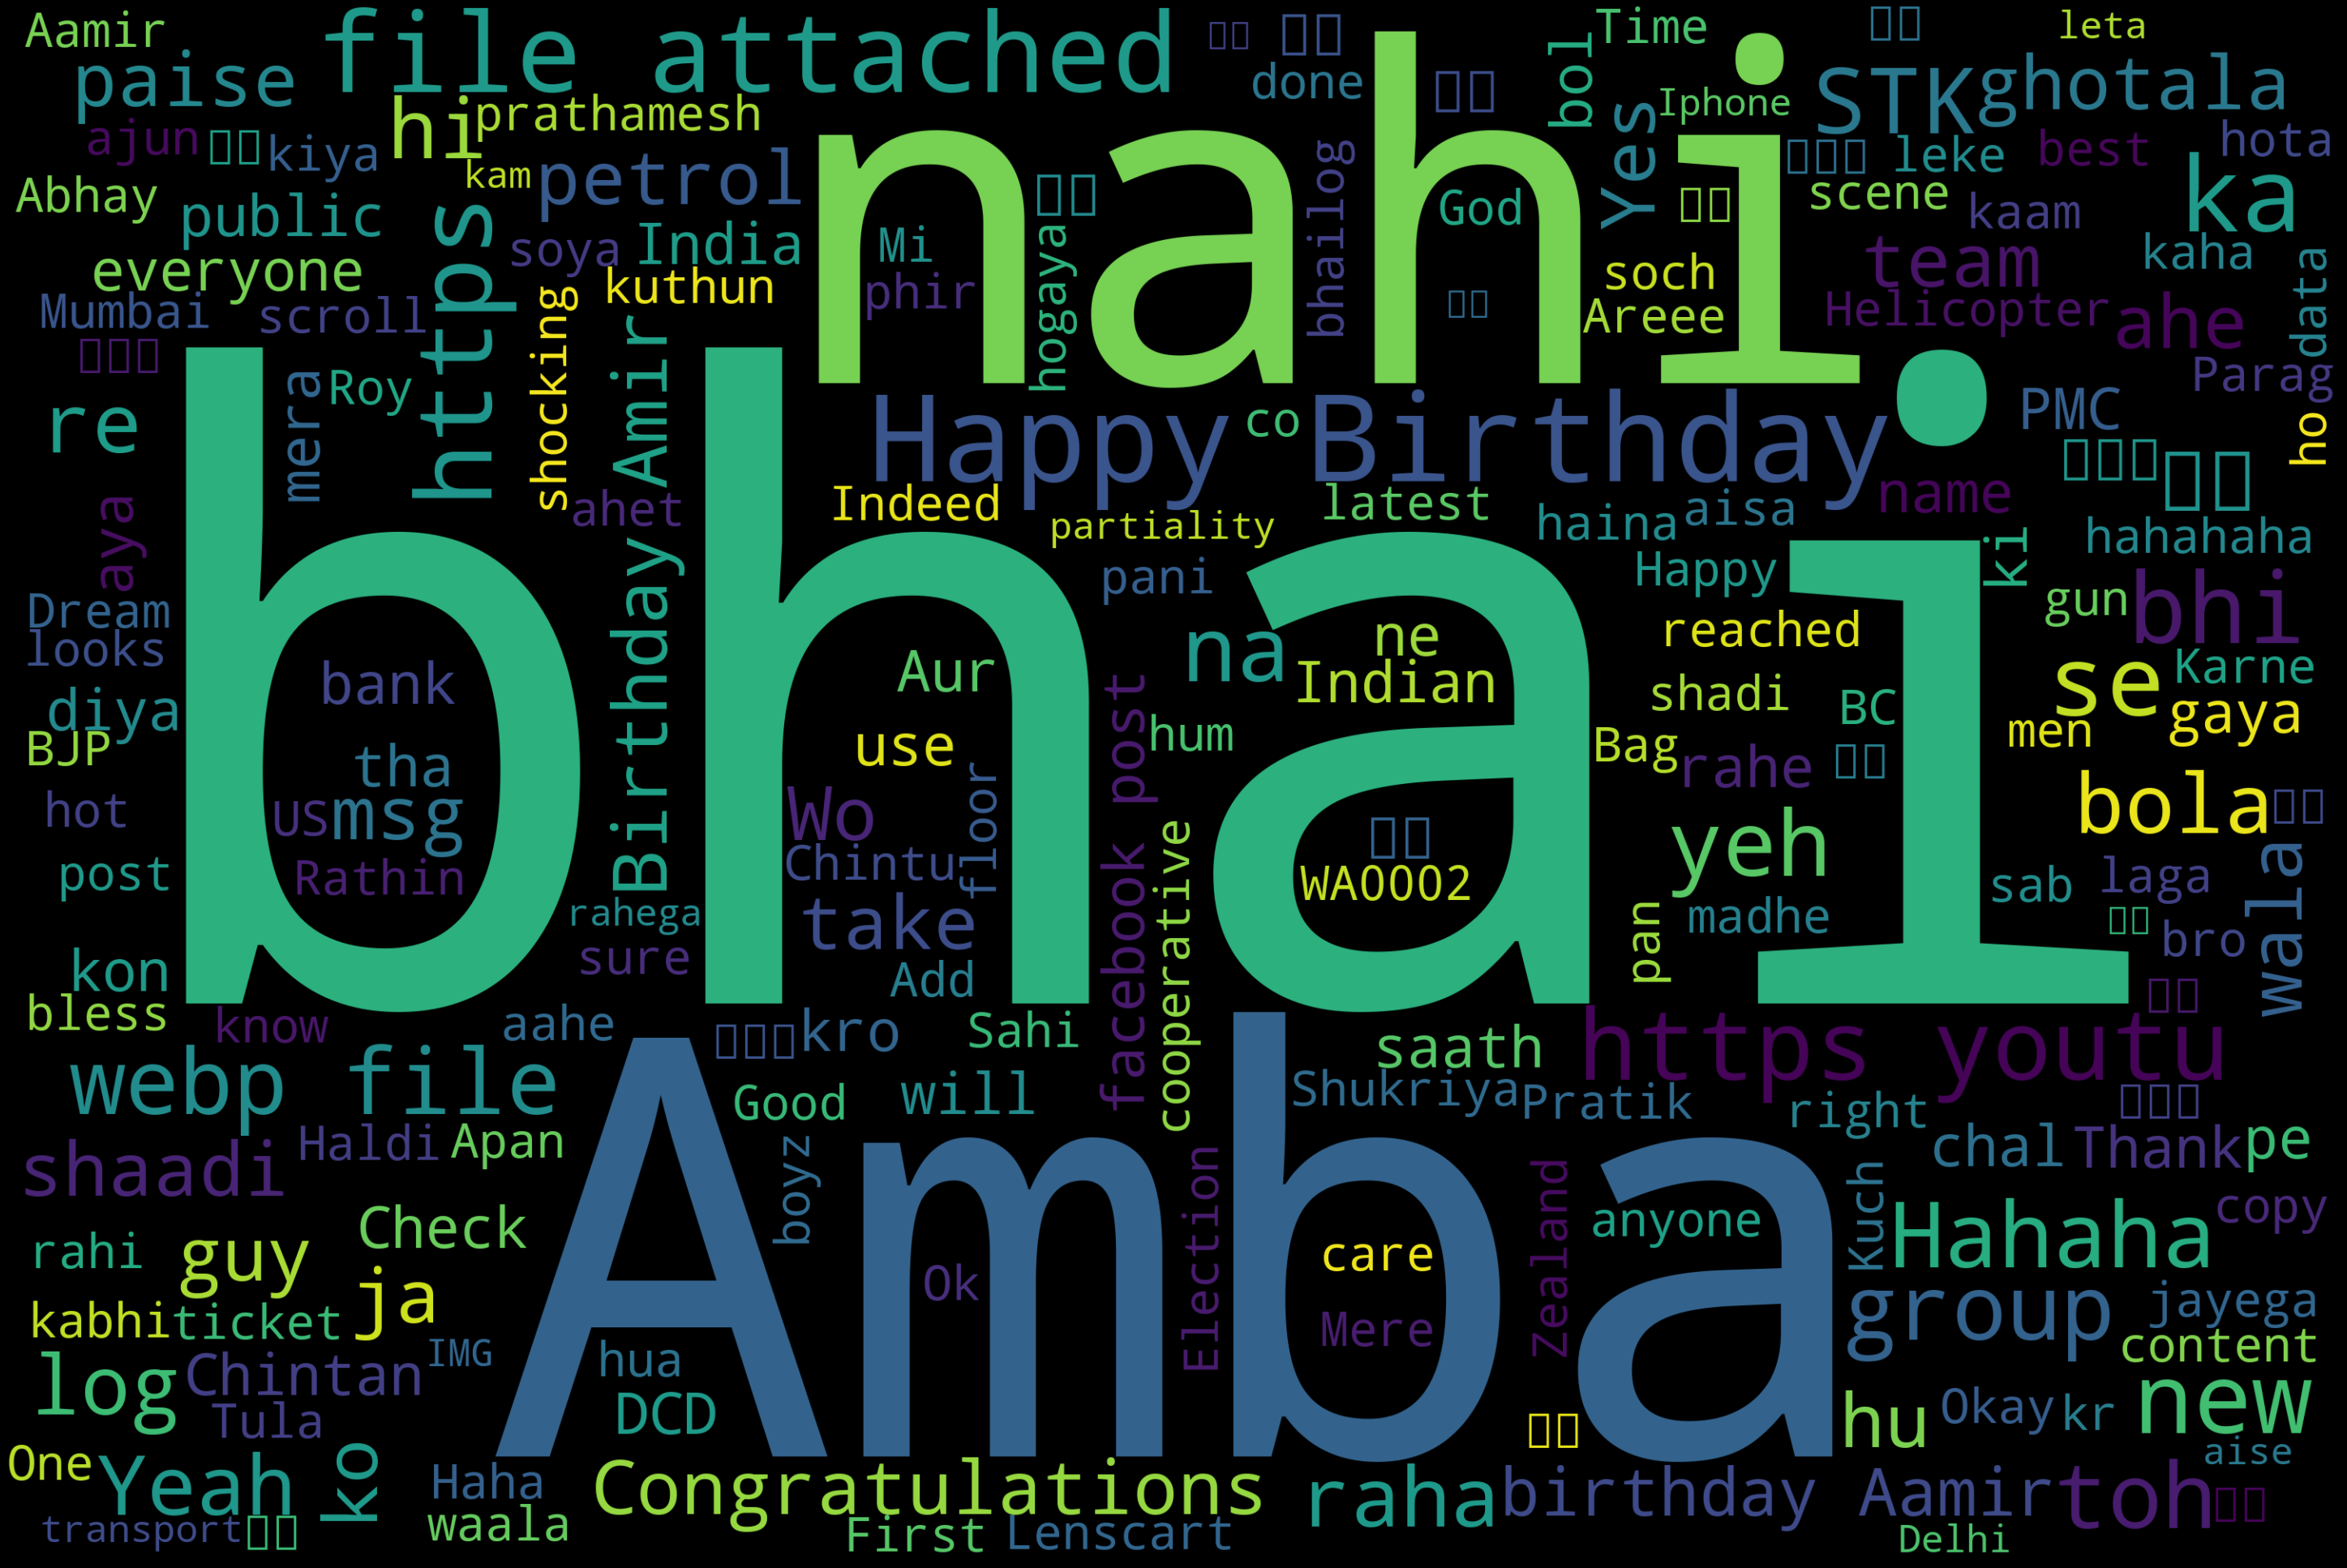

In [125]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = stop_words).generate(str(df['msg']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [126]:
fig.savefig('wordcloud-rave.jpeg')

In [20]:
emojis.

{'😍', '😢'}